In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Evaluation metrics for trained model
    
RETURN
------
    {EVALUATION-METRIC}.csv : csv file
        Evaluation metrics scores


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/{NN or CV}/{EXPERIMENT}/{EVALUATION-METRIC}.csv
'''

# importing default libraries
# import os, argparse, sys
# sys.path.append('./')
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
# importing scripts in scripts folder
from scripts import settings as srp
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

time_start = dt.datetime.now().time().strftime('%H:%M:%S') # = time.time() dt.datetime.now().strftime('%Y%m%d_%I%M%S%p')

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


scripts/settings.py - PATHS IMPORTED!!!


In [3]:
# dataset              = 'model_result_train_test_split.csv'
# NN_or_CV             = 'NN'
# split                = '_KFold'

NN_or_CV             = 'CV'
split = ''

## MELANOMA
# dataset              = 'reference_query_log1p.pck'
# experiment           = 'exper_melanoma'

## MOUSE
# dataset              = 'mouse_retrieval_cv_sw_StandardScaler.pck'
# experiment           = 'exper_mouse'
# cv_result_mouse_retrieval_cv_sw_StandardScaler

## PBMC
dataset              = 'Immune_sw_log1p.pck'
experiment           = 'exper_pbmc'

loc_read = os.path.join(srp.DIR_MODELS, NN_or_CV, experiment)
# the output location
loc_output = os.path.join(srp.DIR_REPORTS, NN_or_CV, experiment, dataset.split('.')[0])
srp.define_folder(loc_=loc_output)

'./reports/CV/exper_pbmc/Immune_sw_log1p/'

In [4]:
pd.read_pickle('./data/processed/exper_pbmc/Immune_sw_log1p.pck')

,isg15,dvl1,gnb1,gabrd,prkcz,hes5,tp73,per3,eno1,slc2a5,...,kcnj15,ets2,igsf5,sik1,pfkl,trpm2,itgb2,col6a1,col6a2,cell_type
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,7.200192,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,CD14
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,7.348456,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,CD14
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,7.107026,0.0,0.0,0.0,0.0,8.205092,0.0,0.0,CD14
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,6.883113,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,7.170539,0.0,0.0,CD14
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,CD14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,0.000000,6.133358,0.0,0.0,0.000000,0.0,0.0,0.0,6.825420,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,6.133358,0.0,0.0,Treg
17496,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Treg
17497,7.794899,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Treg
17498,0.000000,0.000000,0.0,0.0,6.762218,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Treg


In [4]:
# df_result = pd.read_csv(os.path.join(loc_read, dataset))
df_result = pd.read_pickle(os.path.join(loc_read, ('cv_result_'+dataset.split('.')[0]+split+'.pck')))
df_result

,2cell,4cell,8cell,ESC,HSC,ICM,neuron,spleen,zygote,prediction,ground_truth,design,index_split
0,2.937055e-06,0.999168,0.000816,9.488678e-07,8.917010e-07,1.139395e-05,8.853686e-09,2.597661e-08,1.174593e-08,4cell,4cell,a1,0
1,1.123946e-05,0.999617,0.000365,1.657561e-06,5.651574e-07,5.007975e-06,4.878438e-09,1.466037e-08,1.813362e-08,4cell,4cell,a1,0
2,8.840703e-09,0.000056,0.999665,2.377408e-04,9.021806e-07,2.770728e-05,1.337884e-05,7.219705e-08,1.282004e-08,8cell,8cell,a1,0
3,2.158915e-09,0.000028,0.999900,5.449748e-05,2.385248e-07,7.510227e-06,1.003384e-05,1.321301e-08,2.989198e-09,8cell,8cell,a1,0
4,9.998385e-01,0.000148,0.000001,5.116792e-06,8.570102e-08,1.547928e-07,1.269451e-08,1.046597e-06,6.309923e-06,2cell,2cell,a1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,7.152375e-06,0.087383,0.000014,3.088483e-06,1.114422e-07,6.387041e-06,9.125535e-01,2.018245e-05,1.256004e-05,neuron,HSC,a2,499
1360,9.149845e-01,0.034870,0.000109,2.589231e-03,1.052862e-04,1.696955e-03,7.430092e-03,1.224596e-03,3.698999e-02,2cell,HSC,a2,499
1361,5.938939e-02,0.013814,0.000344,3.034024e-03,1.140359e-03,8.082180e-04,9.057447e-01,7.819344e-04,1.494305e-02,neuron,HSC,a2,499
1362,6.570928e-01,0.110270,0.000306,7.624790e-04,5.907457e-05,1.212978e-05,2.066054e-01,4.049880e-05,2.485082e-02,2cell,HSC,a2,499


In [5]:
# list_homo, list_comp, list_vmes, list_ari, list_ami, list_fm, list_acc = [],[],[],[],[],[],[]
list_f1, list_precision, list_recall, list_acc, list_bacc = [],[],[],[],[]
# list_rocauc

for i_design in df_result['design'].unique():
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
        
#         list_homo.append([homogeneity_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'homogeneity'])
#         list_comp.append([completeness_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'completeness'])
#         list_vmes.append([v_measure_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'v_measure'])
#         list_ari.append([adjusted_rand_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'ari'])
#         list_ami.append([adjusted_mutual_info_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'ami'])
#         list_fm.append([fowlkes_mallows_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'fowlkes_mallows'])
        
        for i_average in ['micro','macro','weighted']:
            list_f1.append([f1_score(df_temp['ground_truth'], df_temp['prediction'], average=i_average), i_exp, i_design, 'f1-'+i_average])
            list_precision.append([precision_score(df_temp['ground_truth'], df_temp['prediction'], average=i_average), i_exp, i_design, 'precision-'+i_average])
            list_recall.append([recall_score(df_temp['ground_truth'], df_temp['prediction'], average=i_average), i_exp, i_design, 'recall-'+i_average])
        list_acc.append([accuracy_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'accuracy'])
        list_bacc.append([balanced_accuracy_score(df_temp['ground_truth'], df_temp['prediction']), i_exp, i_design, 'balanced accuracy'])

DESIGN a1
DESIGN a2


In [6]:
# result = [element for lis in [list_homo, list_comp, list_vmes, list_ari, list_ami, list_fm, list_f1, list_precision, list_recall, list_acc, list_bacc] for element in lis]
result = [element for lis in [list_f1, list_precision, list_recall, list_acc, list_bacc] for element in lis]

df_metric = pd.DataFrame(result, columns=['score','expr','design','metric'])
print(df_metric.shape)
df_metric.head()

(11000, 4)


,score,expr,design,metric
0,0.941392,0,a1,f1-micro
1,0.378411,0,a1,f1-macro
2,0.936656,0,a1,f1-weighted
3,0.936996,1,a1,f1-micro
4,0.494095,1,a1,f1-macro


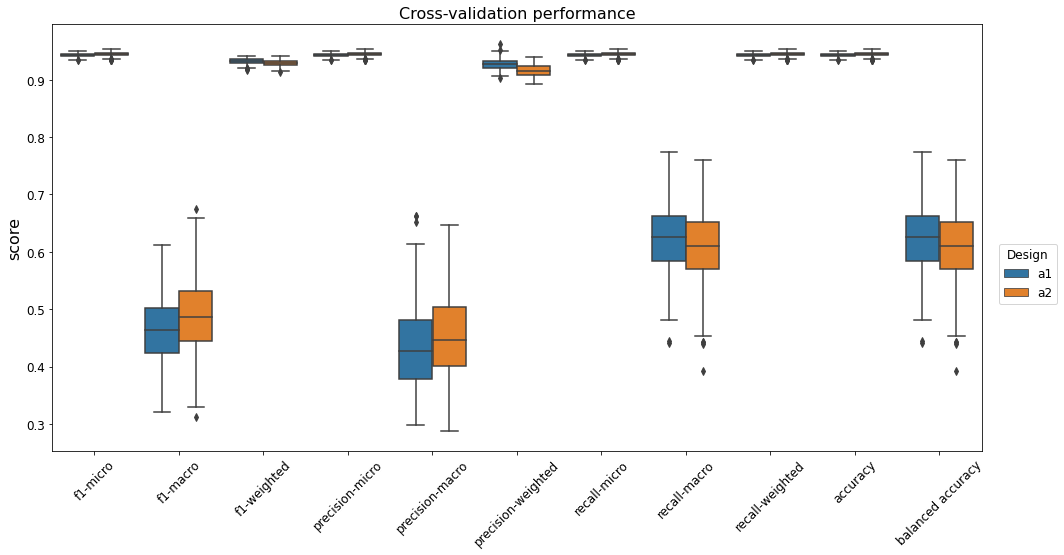

In [7]:
sns.set_palette("tab10")
plt.figure(figsize=(15,8))
sns.boxplot(data=df_metric, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
# legend = plt.legend(title='Proposed network', loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=False, shadow=False, ncol=2)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.05, 0.5))
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
plt.xticks(rotation=45)
plt.title('Cross-validation performance')
plt.tight_layout();
plt.savefig(os.path.join(loc_output,('1_metrics.png')), dpi=300, bbox_inches = 'tight')

In [8]:
list_f1, list_precision, list_recall = [],[],[]
keys_all = sorted(df_result['ground_truth'].unique())
dict_ = {key: None for key in keys_all}
for i_design in df_result['design'].unique():
    print('DESIGN', i_design)
    
    for i_exp in df_result['index_split'].unique():
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
#         F1 score
        tmp = f1_score(df_temp['ground_truth'], df_temp['prediction'], average=None)
        keys = sorted(df_temp['ground_truth'].unique())
        dict_t = dict(zip(keys, tmp))
        dict_tmp = {'experience':i_exp, 'design':i_design, 'metric':'f1'}
        dict_t.update(dict_tmp)
        list_f1.append({**dict_, **dict_t})
        
#         PRECISION score
        tmp = precision_score(df_temp['ground_truth'], df_temp['prediction'], average=None)
        keys = sorted(df_temp['ground_truth'].unique())
        dict_t = dict(zip(keys, tmp))
#         dict_t['experience'] = i_exp
#         dict_t['design'] = i_design
#         dict_t['metric'] = 'precision'
        dict_tmp = {'experience':i_exp, 'design':i_design, 'metric':'precision'}
        dict_t.update(dict_tmp)
        list_precision.append({**dict_, **dict_t})
        
#         RECALL score
        tmp = recall_score(df_temp['ground_truth'], df_temp['prediction'], average=None)
        keys = sorted(df_temp['ground_truth'].unique())
        dict_t = dict(zip(keys, tmp))
        dict_tmp = {'experience':i_exp, 'design':i_design, 'metric':'recall'}
        dict_t.update(dict_tmp)
        list_recall.append({**dict_, **dict_t})

DESIGN a1
DESIGN a2


In [9]:
col = sorted(df_temp['ground_truth'].unique())
col.extend(['expr','design','metric'])

result = [element for lis in [list_f1, list_precision, list_recall] for element in lis]

df_label = pd.DataFrame(result, columns=col)
# df_label

df_label_melt = pd.melt(frame=df_label, id_vars=['design','metric','expr'])
# df_label_melt

<Figure size 1080x576 with 0 Axes>

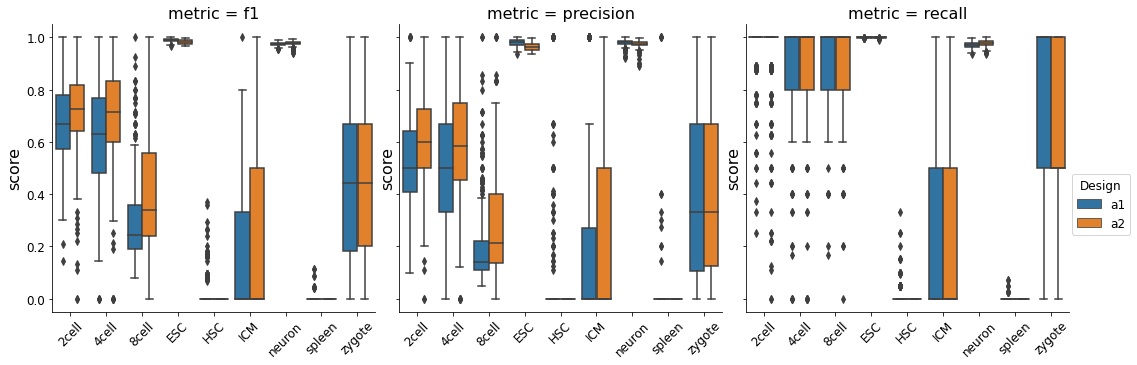

In [10]:
plt.figure(figsize=(15,8));
g=sns.catplot(data=df_label_melt, x='variable', y='value', hue='design', col='metric', kind="box", legend=False);
g.set(xlabel=None, ylabel='score')
g.set_xticklabels(rotation=45)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.1, 0.5))
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
# plt.tight_layout();
plt.savefig(os.path.join(loc_output,'2_f1_precision_recall.png'), dpi=300, bbox_inches = 'tight');

DESIGN a1
DESIGN a2


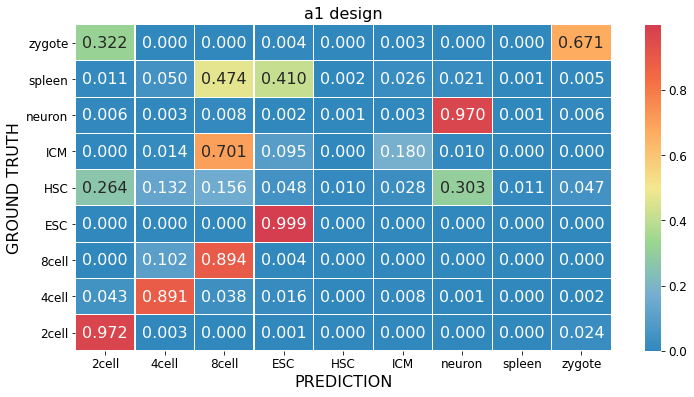

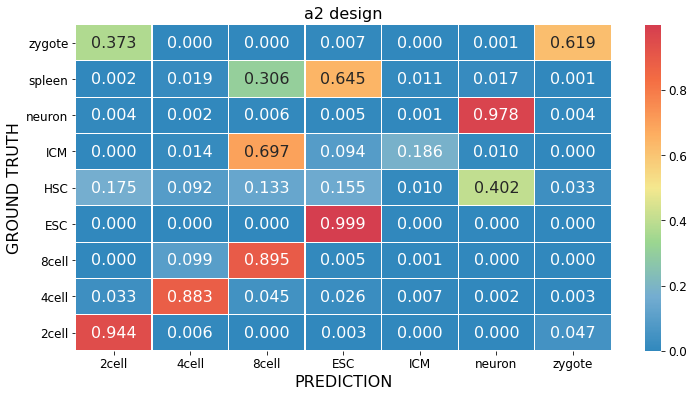

In [11]:
# sns.set_context("notebook")
for i_design in df_result['design'].unique():
    df_concat = pd.DataFrame()
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
#         print('experiment', i_exp)
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
#         print(len(df_temp))
        df_crosstab = pd.crosstab(df_temp['ground_truth'], df_temp['prediction']).div(df_temp['ground_truth'].value_counts(), axis=0)
#         df_concat = pd.concat([df_concat, df_crosstab])
        df_concat = df_concat.add(df_crosstab, fill_value=0)
#     print(i_exp+1)
    plot_cm = srp.heatmap_cv(df_concat[::-1]/(i_exp+1), (i_design+' design'))
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.png'), dpi=300, bbox_inches = 'tight')

In [ ]:
len(df_result['index_split'].unique())